In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run40-race-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20201116-RUN40-DataSheet-UMI-Constant-RACE.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig,Sample
0,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S245,...,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE,ID598t0-R-IgGE_S245
1,N722_S516,ID629t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S246,...,BCRh,ID629t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE,ID629t0-R-IgGE_S246
2,N723_S516,ID638t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S247,...,BCRh,ID638t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE,ID638t0-R-IgGE_S247
3,N724_S516,ID657t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S248,...,BCRh,ID657t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE,ID657t0-R-IgGE_S248
4,N726_S516,ID598t0-R-IgM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S249,...,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgM,ID598t0-R-IgM_S249


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles.sort()
myfiles

['cdr3-clones-RACE-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,ID598t0-R-IgGE_S245,CGRGPSGVATIGGGQGTLVT,2304
1,ID598t0-R-IgGE_S245,CGRDASRHHVDIVATILGYWGQGTLVT,2052
2,ID598t0-R-IgGE_S245,CAKVGDDYSGSHLWSGYFDNWGQGTLVT,1584
3,ID598t0-R-IgGE_S245,CAKDRSGNYKGYLDYWGPGTLVT,1466
4,ID598t0-R-IgGE_S245,CARAHYYDTSDTQEAFDIWGQGTMVT,1079


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
12838,ID657t0-R-IgM_S252,YARNQYLRLDAFDVWGQGTMVT,1
12839,ID657t0-R-IgM_S252,YARRTFPLLTGYYRGYFDYWGQGTLVT,1
12840,ID657t0-R-IgM_S252,YARVAKSGDYGGEYYYYYMDVWGKGTTVT,1
12841,ID657t0-R-IgM_S252,YARVPSTRAATLYFDYWGQGTLVT,1
12842,ID657t0-R-IgM_S252,YASHRMTVVRGVILGAYNFDYWGQGTLVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig
0,ID598t0-R-IgGE_S245,CGRGPSGVATIGGGQGTLVT,2304,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE
1,ID598t0-R-IgGE_S245,CGRDASRHHVDIVATILGYWGQGTLVT,2052,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE
2,ID598t0-R-IgGE_S245,CAKVGDDYSGSHLWSGYFDNWGQGTLVT,1584,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE
3,ID598t0-R-IgGE_S245,CAKDRSGNYKGYLDYWGPGTLVT,1466,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE
4,ID598t0-R-IgGE_S245,CARAHYYDTSDTQEAFDIWGQGTMVT,1079,N721_S516,ID598t0-R-IgGE,NaN,NaN,NaN,NaN,NaN,...,human,BCRh,ID598t0,IgSub RACE,yes,NaN,no,yes,yes,IgGE


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,ID598t0,ID598t0-R-IgGE_S245,CAAKGASDYTYYAVDVWGQGTTVT,2
1,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDAWGQGTLVT,1
2,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTLVT,57
3,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTQVT,1
4,ID598t0,ID598t0-R-IgGE_S245,CAEDMIYSSRCYYFDSWGQGVLVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,ID598t0-R-IgGE_S245,18247
1,ID598t0-R-IgM_S249,23814
2,ID629t0-R-IgGE_S246,27600
3,ID629t0-R-IgM_S250,22464
4,ID638t0-R-IgGE_S247,11000


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,ID598t0,ID598t0-R-IgGE_S245,CAAKGASDYTYYAVDVWGQGTTVT,2,18247
1,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDAWGQGTLVT,1,18247
2,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTLVT,57,18247
3,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTQVT,1,18247
4,ID598t0,ID598t0-R-IgGE_S245,CAEDMIYSSRCYYFDSWGQGVLVT,1,18247


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
12838,ID657t0,ID657t0-R-IgM_S252,YARNQYLRLDAFDVWGQGTMVT,1,19969
12839,ID657t0,ID657t0-R-IgM_S252,YARRTFPLLTGYYRGYFDYWGQGTLVT,1,19969
12840,ID657t0,ID657t0-R-IgM_S252,YARVAKSGDYGGEYYYYYMDVWGKGTTVT,1,19969
12841,ID657t0,ID657t0-R-IgM_S252,YARVPSTRAATLYFDYWGQGTLVT,1,19969
12842,ID657t0,ID657t0-R-IgM_S252,YASHRMTVVRGVILGAYNFDYWGQGTLVT,1,19969


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,ID598t0,ID598t0-R-IgGE_S245,CAAKGASDYTYYAVDVWGQGTTVT,2,18247,0.010961
1,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDAWGQGTLVT,1,18247,0.005480
2,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTLVT,57,18247,0.312380
3,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTQVT,1,18247,0.005480
4,ID598t0,ID598t0-R-IgGE_S245,CAEDMIYSSRCYYFDSWGQGVLVT,1,18247,0.005480


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['ID598t0-R-IgGE_S245',
 'ID598t0-R-IgM_S249',
 'ID629t0-R-IgGE_S246',
 'ID629t0-R-IgM_S250',
 'ID638t0-R-IgGE_S247',
 'ID638t0-R-IgM_S251',
 'ID657t0-R-IgGE_S248',
 'ID657t0-R-IgM_S252']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,ID598t0-R-IgM_S249,ID598t0-R-IgGE_S245,0.306542,0.016441
1,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783
2,ID629t0-R-IgM_S250,ID598t0-R-IgGE_S245,1.633725,0.010961
3,ID638t0-R-IgGE_S247,ID598t0-R-IgGE_S245,3.545455,0.027402
4,ID598t0-R-IgGE_S245,ID638t0-R-IgM_S251,0.000000,0.000000


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,ID598t0-R-IgM_S249,ID598t0-R-IgGE_S245,0.306542,0.016441,ID598t0,ID598t0
1,ID629t0-R-IgM_S250,ID598t0-R-IgGE_S245,1.633725,0.010961,ID629t0,ID598t0
2,ID638t0-R-IgGE_S247,ID598t0-R-IgGE_S245,3.545455,0.027402,ID638t0,ID598t0
3,ID657t0-R-IgGE_S248,ID598t0-R-IgGE_S245,0.686140,0.027402,ID657t0,ID598t0
4,ID657t0-R-IgM_S252,ID598t0-R-IgGE_S245,3.099805,0.005480,ID657t0,ID598t0


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,6,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783,ID598t0,ID629t0
1,11,ID657t0-R-IgGE_S248,ID638t0-R-IgGE_S247,2.885055,1.772727,ID657t0,ID638t0
2,26,ID657t0-R-IgM_S252,ID598t0-R-IgM_S249,1.617507,1.440329,ID657t0,ID598t0
3,8,ID598t0-R-IgM_S249,ID629t0-R-IgM_S250,3.132611,1.135150,ID598t0,ID629t0
4,16,ID629t0-R-IgGE_S246,ID657t0-R-IgGE_S248,16.492754,0.424753,ID629t0,ID657t0


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,6,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783,ID598t0,ID629t0,different
1,11,ID657t0-R-IgGE_S248,ID638t0-R-IgGE_S247,2.885055,1.772727,ID657t0,ID638t0,different
2,26,ID657t0-R-IgM_S252,ID598t0-R-IgM_S249,1.617507,1.440329,ID657t0,ID598t0,different
3,8,ID598t0-R-IgM_S249,ID629t0-R-IgM_S250,3.132611,1.135150,ID598t0,ID629t0,different
4,16,ID629t0-R-IgGE_S246,ID657t0-R-IgGE_S248,16.492754,0.424753,ID629t0,ID657t0,different


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run40-race-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,6,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783,ID598t0,ID629t0,different
1,1,11,ID657t0-R-IgGE_S248,ID638t0-R-IgGE_S247,2.885055,1.772727,ID657t0,ID638t0,different
2,2,26,ID657t0-R-IgM_S252,ID598t0-R-IgM_S249,1.617507,1.440329,ID657t0,ID598t0,different
3,3,8,ID598t0-R-IgM_S249,ID629t0-R-IgM_S250,3.132611,1.135150,ID598t0,ID629t0,different
4,4,16,ID629t0-R-IgGE_S246,ID657t0-R-IgGE_S248,16.492754,0.424753,ID629t0,ID657t0,different


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,6,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783,ID598t0,ID629t0,different,ID598t0-R-IgGE_S245->ID629t0-R-IgGE_S246,blue
1,1,11,ID657t0-R-IgGE_S248,ID638t0-R-IgGE_S247,2.885055,1.772727,ID657t0,ID638t0,different,ID657t0-R-IgGE_S248->ID638t0-R-IgGE_S247,blue
2,2,26,ID657t0-R-IgM_S252,ID598t0-R-IgM_S249,1.617507,1.440329,ID657t0,ID598t0,different,ID657t0-R-IgM_S252->ID598t0-R-IgM_S249,blue
3,3,8,ID598t0-R-IgM_S249,ID629t0-R-IgM_S250,3.132611,1.135150,ID598t0,ID629t0,different,ID598t0-R-IgM_S249->ID629t0-R-IgM_S250,blue
4,4,16,ID629t0-R-IgGE_S246,ID657t0-R-IgGE_S248,16.492754,0.424753,ID629t0,ID657t0,different,ID629t0-R-IgGE_S246->ID657t0-R-IgGE_S248,blue


Wrote run40-race-IGH-HUMAN-shared-clones-all.pdf to disk


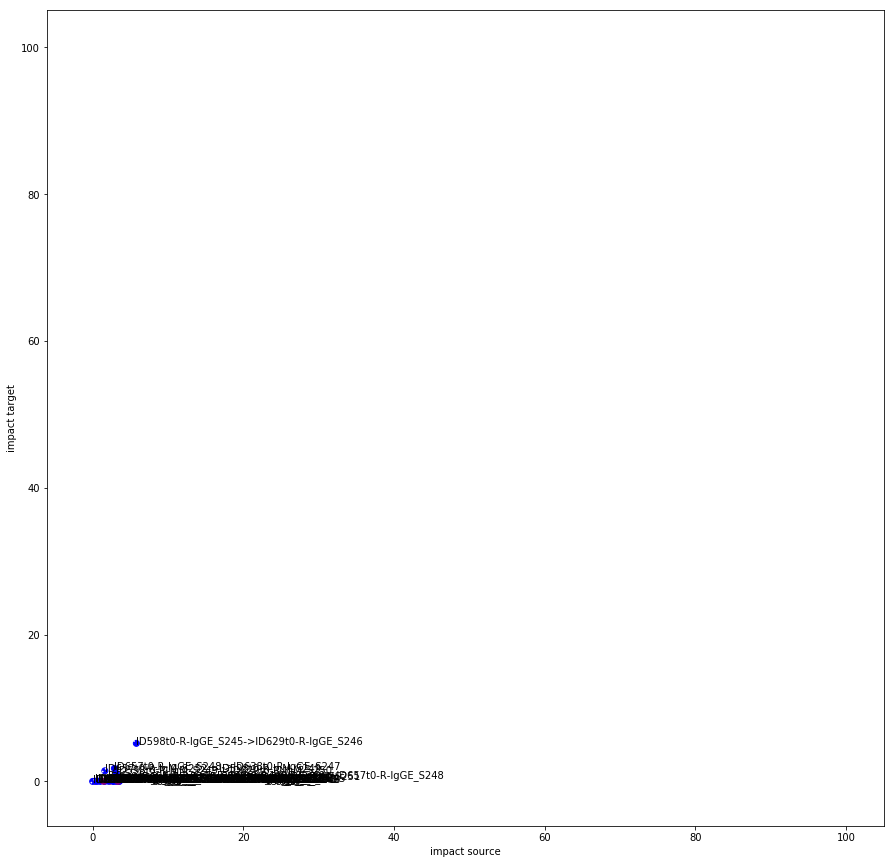

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,ID598t0-R-IgGE_S245,ID629t0-R-IgGE_S246,5.798213,5.184783,different,ID598t0-R-IgGE_S245->ID629t0-R-IgGE_S246,blue
1,1,ID657t0-R-IgGE_S248,ID638t0-R-IgGE_S247,2.885055,1.772727,different,ID657t0-R-IgGE_S248->ID638t0-R-IgGE_S247,blue
2,2,ID657t0-R-IgM_S252,ID598t0-R-IgM_S249,1.617507,1.440329,different,ID657t0-R-IgM_S252->ID598t0-R-IgM_S249,blue
3,3,ID598t0-R-IgM_S249,ID629t0-R-IgM_S250,3.132611,1.135150,different,ID598t0-R-IgM_S249->ID629t0-R-IgM_S250,blue
4,4,ID629t0-R-IgGE_S246,ID657t0-R-IgGE_S248,16.492754,0.424753,different,ID629t0-R-IgGE_S246->ID657t0-R-IgGE_S248,blue


Wrote run40-race-IGH-HUMAN-shared-clones-different-ids.pdf to disk


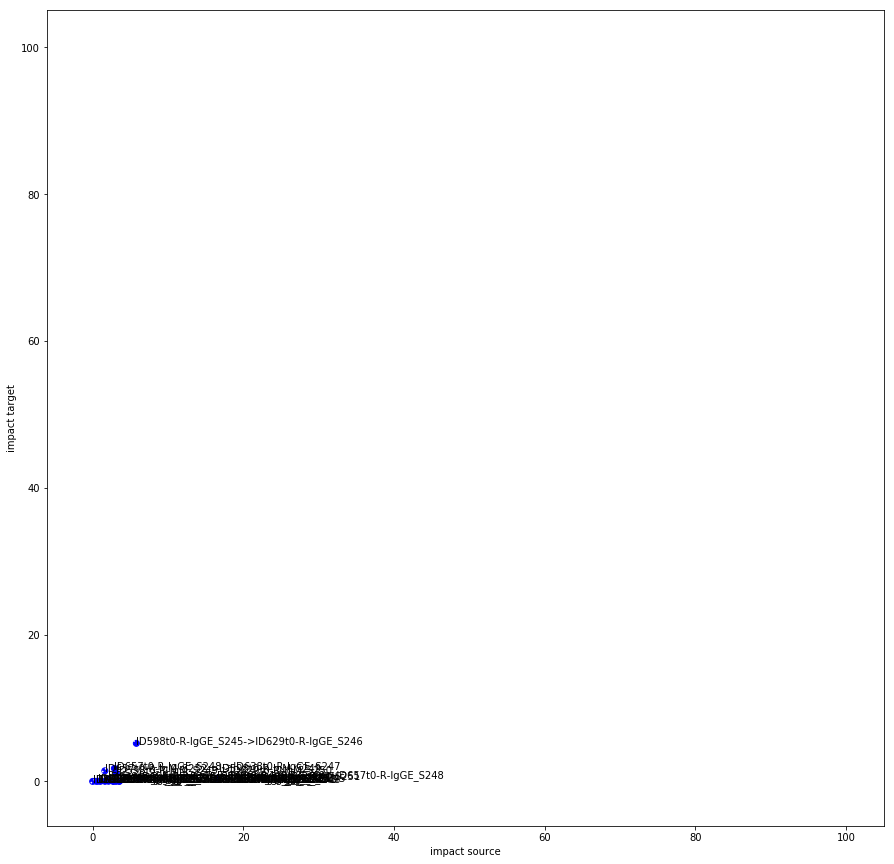

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,ID598t0,ID598t0-R-IgGE_S245,CAAKGASDYTYYAVDVWGQGTTVT,2,18247,0.010961
1,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDAWGQGTLVT,1,18247,0.005480
2,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTLVT,57,18247,0.312380
3,ID598t0,ID598t0-R-IgGE_S245,CAATYYGRRYYDTVFDPWGQGTQVT,1,18247,0.005480
4,ID598t0,ID598t0-R-IgGE_S245,CAEDMIYSSRCYYFDSWGQGVLVT,1,18247,0.005480


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient           Sample                     
                         nunique    names nunique                names
cdr3pep                                                               
AFLEWPNNYYYYYMDVWGKGTTVT       1  ID657t0       1  ID657t0-R-IgGE_S248
AFLEWPNYYYMDVWGKGTTVT          1  ID657t0       1  ID657t0-R-IgGE_S248
AFLEWPNYYYYMDVWGKGTTVT         1  ID657t0       1  ID657t0-R-IgGE_S248
AFLEWPNYYYYYMDVWGKGTMVT        1  ID657t0       1  ID657t0-R-IgGE_S248
AFLEWPNYYYYYMDVWGKGTTVT        1  ID657t0       1  ID657t0-R-IgGE_S248

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                   cdr3pep             ID598t0                     \
Sample                            ID598t0-R-IgGE_S245 ID598t0-R-IgM_S249   
0        AFLEWPNNYYYYYMDVWGKGTTVT                 NaN                NaN   
1           AFLEWPNYYYMDVWGKGTTVT                 NaN                NaN   
2          AFLEWPNYYYYMDVWGKGTTVT                 NaN                NaN   
3         AFLEWPNYYYYYMDVWGKGTMVT                 NaN                NaN   
4         AFLEWPNYYYYYMDVWGKGTTVT                 NaN                NaN   

Patient             ID629t0                                ID638t0  \
Sample  ID629t0-R-IgGE_S246 ID629t0-R-IgM_S250 ID638t0-R-IgGE_S247   
0                       NaN                NaN                 NaN   
1                       NaN                NaN                 NaN   
2                       NaN                NaN                 NaN   
3                       NaN                NaN                 NaN   
4                       NaN                NaN                 NaN   

Patient                                ID657t0                     
Sample  ID638t0-R-IgM_S251 ID657t0-R-IgGE_S248 ID657t0-R-IgM_S252  
0                      NaN            0.001634                NaN  
1                      NaN            0.001634                NaN  
2                      NaN            0.006535                NaN  
3                      NaN            0.001634                NaN  
4                      NaN            0.246684                NaN

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index                       cdr3pep Patient  \
                                       nunique   
0   2280      CARAFSSSWTDNWFDPWGQGTLVT       4   
1  10341       CASRVGYSSGWYFDYWGQGTLVT       3   
2  11143       CGKSHRSLIVVPALDCGQGTLVT       3   
3  11991  CVKVFGFYASGSPTEDYYDYWGQGTLVT       3   
4  12389                     CWGQGTLVT       3   

                                       Sample  \
                                names nunique   
0  ID629t0, ID638t0, ID598t0, ID657t0       4   
1           ID629t0, ID598t0, ID657t0       3   
2           ID629t0, ID598t0, ID657t0       3   
3           ID629t0, ID598t0, ID657t0       3   
4           ID629t0, ID598t0, ID657t0       3   

                                                                 ID598t0  \
                                               names ID598t0-R-IgGE_S245   
0  ID629t0-R-IgGE_S246, ID638t0-R-IgGE_S247, ID65...             0.00548   
1  ID657t0-R-IgGE_S248, ID629t0-R-IgM_S250, ID598...                 NaN   
2  ID629t0-R-IgGE_S246, ID657t0-R-IgGE_S248, ID59...             0.00548   
3  ID629t0-R-IgGE_S246, ID657t0-R-IgGE_S248, ID59...             0.00548   
4  ID629t0-R-IgGE_S246, ID657t0-R-IgGE_S248, ID59...             0.00548   

                                 ID629t0                     \
  ID598t0-R-IgM_S249 ID629t0-R-IgGE_S246 ID629t0-R-IgM_S250   
0                NaN            0.492754                NaN   
1           0.004199                 NaN           1.121795   
2                NaN            0.793478                NaN   
3                NaN            0.692029                NaN   
4                NaN            0.003623                NaN   

              ID638t0                                ID657t0  \
  ID638t0-R-IgGE_S247 ID638t0-R-IgM_S251 ID657t0-R-IgGE_S248   
0            0.009091                NaN            0.001634   
1                 NaN                NaN            0.001634   
2                 NaN                NaN            0.003267   
3                 NaN                NaN            0.001634   
4                 NaN                NaN            0.009802   

                      
  ID657t0-R-IgM_S252  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 12731
cdr3's in > 1 sample: 106


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run40-race-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
